In [3]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Reading the CSV file
#dftrain = pd.read_csv('df_train_edgeproject.csv')
#dftest = pd.read_csv('df_testedgeproject.csv')

dftrain = pd.read_csv('train.csv')
dftest=pd.read_csv('test.csv')

In [11]:
dftest.head(n=5)
df_train = dftrain.iloc[:, 1:]
df_test = dftest.iloc[:,1:]
#len(df_test)

In [12]:
# Count rows with missing values
missing_rows_count_train = df_train.isnull().any(axis=1).sum()
print(f"Number of rows with missing values (train): {missing_rows_count_train}")

# Remove rows with missing values
df_train_clean = df_train.dropna()

# Count rows with missing values
missing_rows_count_test = df_test.isnull().any(axis=1).sum()
print(f"Number of rows with missing values (test): {missing_rows_count_test}")

# Remove rows with missing values
df_test_clean = df_test.dropna()

Number of rows with missing values (train): 0
Number of rows with missing values (test): 0


In [13]:
X_train = df_train_clean.drop(columns = 'activityID')
y_train = df_train_clean['activityID']

X_test = df_test_clean.drop(columns = 'activityID')
y_test = df_test_clean['activityID']


In [14]:
X_train_scaled = X_train
X_test_scaled = X_test

In [21]:
# trying ridge regression (b/c of possible multicolinearity) 
maxiters=1000
logreg_ridge = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', random_state=42,max_iter=maxiters)
logreg_ridge.fit(X_train_scaled, y_train)

C:\Users\malco\.julia\conda\3\x86_64\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [22]:
logreg_ridge.score(X_train_scaled, y_train) #on the training set!!!

0.8341490538253319

In [23]:
logreg_ridge.score(X_test_scaled, y_test) #on the testing set!!!

0.6189115963172284

In [24]:
#just doing standard, unpelanlzied
maxiters=1000
logreg = LogisticRegression(penalty = None, random_state = 15072,max_iter=maxiters).fit(X_train_scaled, y_train)

In [25]:
logreg.score(X_train_scaled, y_train) #on the training set!!!

0.8345115962662202

In [26]:
logreg.score(X_test_scaled, y_test) #on the testing set

0.6214615846706469

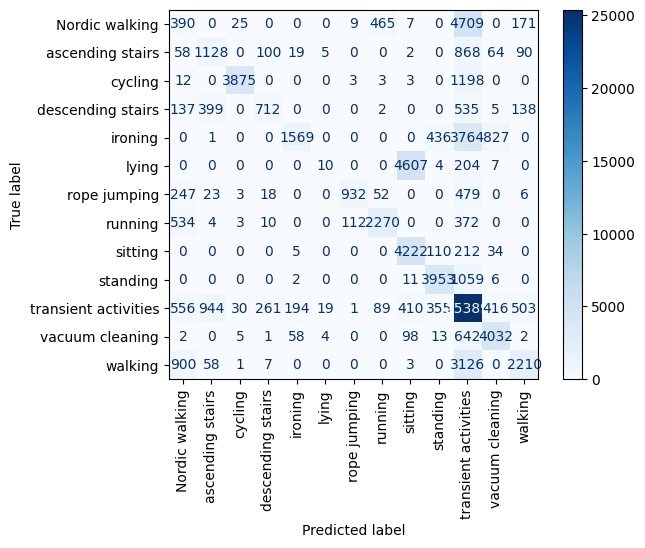

In [27]:
#conf matrix for normal log reg
# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")  # Customize appearance

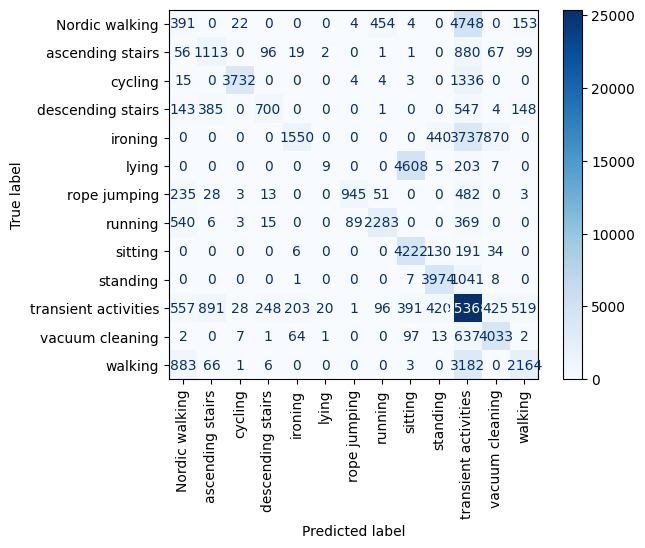

In [28]:
#conf matrix for ridge log reg
# Predict on the test set
y_pred_r = logreg_ridge.predict(X_test_scaled)

# Generate the confusion matrix
cm_r = confusion_matrix(y_test, y_pred_r)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_r, display_labels=logreg_ridge.classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")  # Customize appearance